In [28]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [29]:
df = pd.read_csv("data/scrabble-point-spread.csv")
df.head()

,player_id,points_against,points_for,tournament_id
0,6003,381,443,8163
1,20749,375,435,8163
2,19535,391,443,8163
3,18474,386,439,8163
4,583,396,450,8163


In [30]:
df2 = pd.read_csv("data/scrabble-tournament.csv")
df2.head()

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division
0,NaN,NaN,7,Nigel Richards,2196,2168.0,NaN,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1
1,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,NaN,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1
2,NaN,NaN,8,Will Anderson,2093,2054.0,NaN,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1
3,NaN,NaN,9,Noah Walton,2063,2015.0,NaN,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1
4,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,NaN,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1


In [34]:
df2 = df2.rename(columns={'Player ID': 'player_id'})
df2.head()

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,player_id,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division
0,NaN,NaN,7,Nigel Richards,2196,2168.0,NaN,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1
1,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,NaN,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1
2,NaN,NaN,8,Will Anderson,2093,2054.0,NaN,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1
3,NaN,NaN,9,Noah Walton,2063,2015.0,NaN,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1
4,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,NaN,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1


In [35]:
df.dtypes

player_id         int64
points_against    int64
points_for        int64
tournament_id     int64
dtype: object

In [37]:
df4 = df2.merge(df, on='player_id')
df4.head()

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,player_id,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division,points_against,points_for,tournament_id
0,NaN,NaN,7,Nigel Richards,2196,2168.0,NaN,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1,381,443,8163
1,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,NaN,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1,375,435,8163
2,NaN,NaN,8,Will Anderson,2093,2054.0,NaN,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1,391,443,8163
3,NaN,NaN,9,Noah Walton,2063,2015.0,NaN,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1,386,439,8163
4,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,NaN,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1,396,450,8163


In [38]:
# df3 = pd.read_csv("data/ranked-players-with-scores.csv")
# df3.head()

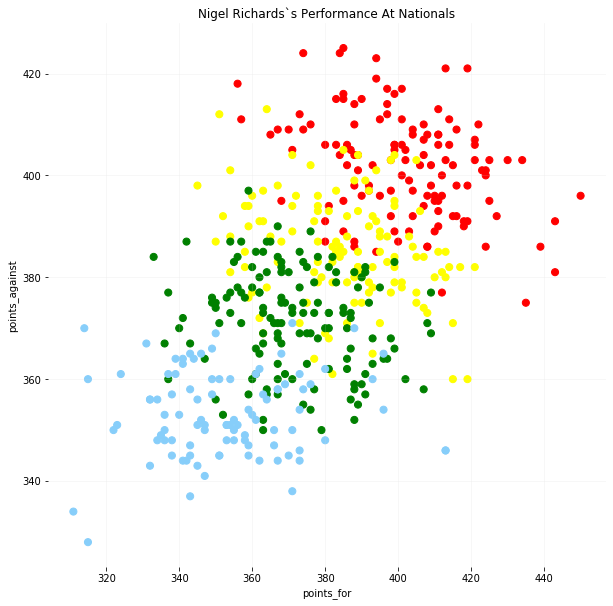

In [50]:
def build_colors(df2):
    if df2['division'] == 'Division 1':
        return 'red'
    elif df2['division'] == 'Division 2':
        return 'yellow'
    elif df2['division'] == 'Division 3':
        return 'green'
    elif df2['division'] == 'Division 4':
        return 'lightskyblue'

colors = df2.reset_index().apply(build_colors, axis=1)

df4.plot(x='points_for', y='points_against', color=colors, kind='scatter', figsize=(10, 10), marker='o', s=50, title='Nigel Richards`s Performance At Nationals')
plt.grid(color='lightgrey', alpha=0.2, zorder=0)

plt.box(False)
plt.savefig("FiveThirtyEight1.pdf")